In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("documents/golden_globe_awards.csv")

In [3]:
df.head()

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
year_film     7991 non-null int64
year_award    7991 non-null int64
ceremony      7991 non-null int64
category      7991 non-null object
nominee       7991 non-null object
film          6191 non-null object
win           7991 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


In [6]:
df.nunique()

year_film       77
year_award      77
ceremony        77
category        76
nominee       4292
film          3083
win              2
dtype: int64

In [7]:
df.isnull().sum()

year_film        0
year_award       0
ceremony         0
category         0
nominee          0
film          1800
win              0
dtype: int64

In [8]:
print('Percentage of null in film column:' )
print(round(df['film'].isnull().sum()/len(df['film'])*100,2),"%")

Percentage of null in film column:
22.53 %


In [14]:
df[df.isna().any(axis=1)].sample(100)

,year_film,year_award,ceremony,category,nominee,film,win
4412,1991,1992,49,Best Television Limited Series or Motion Pictu...,"Sarah, Plain and Tall",NaN,False
1619,1969,1970,27,Henrietta Award (World Film Favorites),Barbra Streisand,NaN,True
6931,2011,2012,69,Best Television Series - Musical or Comedy,Enlightened,NaN,False
1953,1972,1973,30,Best Television Series - Drama,Mannix,NaN,False
7237,2014,2015,72,Best Motion Picture - Musical or Comedy,Into the Woods,NaN,False
...,...,...,...,...,...,...,...
2547,1976,1977,34,Television Movie,Francis Gary Powers: The True Story Of The U-2...,NaN,False
6984,2012,2013,70,Best Motion Picture - Drama,Zero Dark Thirty \t,NaN,False
7306,2014,2015,72,Best Television Series - Musical or Comedy,Transparent,NaN,True
4833,1995,1996,53,Best Motion Picture - Drama,Sense and Sensibility,NaN,True


In [11]:
df.category.unique()

array(['Best Performance by an Actress in a Supporting Role in any Motion Picture',
       'Best Performance by an Actor in a Supporting Role in any Motion Picture',
       'Best Director - Motion Picture', 'Picture',
       'Actress In A Leading Role', 'Actor In A Leading Role',
       'Promoting International Understanding',
       'Special Achievement Award', 'Best Screenplay - Motion Picture',
       'Best Original Score - Motion Picture',
       'New Star Of The Year - Actress', 'New Star Of The Year - Actor',
       'Juvenile Performance', 'Cinematography',
       'Foreign Film - English Language',
       'Best Motion Picture - Foreign Language',
       'Outstanding Use Of Color',
       'Best Performance by an Actress in a Motion Picture - Drama',
       'Best Performance by an Actor in a Motion Picture - Drama',
       'Best Performance by an Actor in a Motion Picture - Musical or Comedy',
       'New Star Of The Year',
       'Actress In A Leading Role - Musical Or Comedy',
  

In [17]:
df['nominee'].value_counts().head(10)

Meryl Streep        33
John Williams       23
Jack Lemmon         23
Shirley MacLaine    21
Al Pacino           19
Jack Nicholson      18
Carol Burnett       17
Alan Alda           16
Barbra Streisand    16
Jessica Lange       16
Name: nominee, dtype: int64

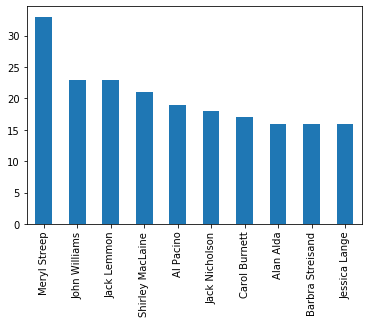

In [18]:
df['nominee'].value_counts().head(10).plot.bar()

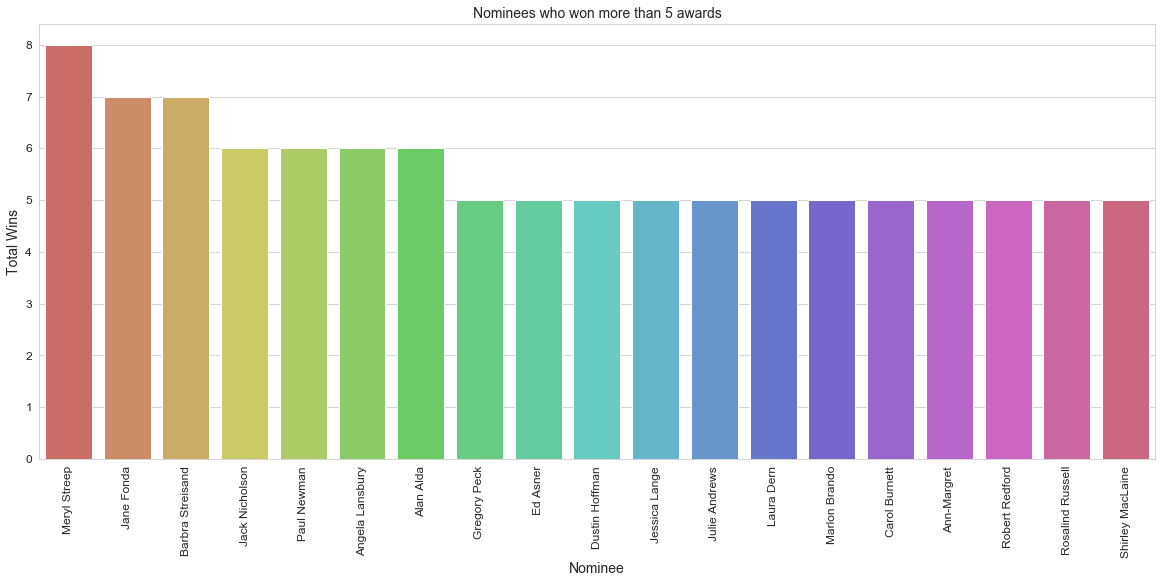

In [19]:
more_5_win = df.groupby('nominee')['win'].sum().reset_index()
more_5_win = more_5_win[more_5_win['win'] >= 5].sort_values(ascending=False, by='win')

# print('There are ', more_5_win['win'].count(), 'nominees who won more than 5 awards')
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='nominee', y='win', data=more_5_win, palette='hls')
plt.title('Nominees who won more than 5 awards', fontsize=14)
plt.xlabel('Nominee', fontsize=14)
plt.ylabel('Total Wins', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

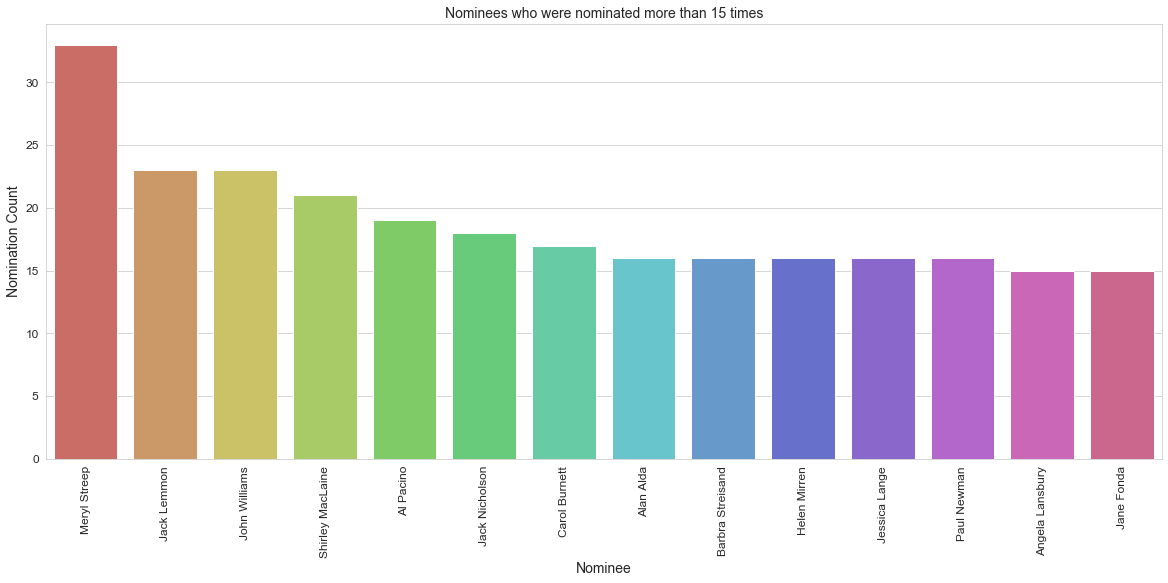

In [22]:
more_15_nominated = df.groupby('nominee')['win'].count().reset_index()
more_15_nominated = more_15_nominated[more_15_nominated['win'] >= 15].sort_values(ascending=False, by='win')

# print('There are ', more_5_win['win'].count(), 'nominees who won more than 5 awards')
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='nominee', y='win', data=more_15_nominated, palette='hls')
plt.title('Nominees who were nominated more than 15 times', fontsize=14)
plt.xlabel('Nominee', fontsize=14)
plt.ylabel('Nomination Count', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

In [29]:
film_awards_year = df.groupby(['film', 'year_award'])['win'].sum().reset_index()
film_awards_year = film_awards_year.sort_values(ascending=False, by='win')
film_awards_year = film_awards_year.head(10)

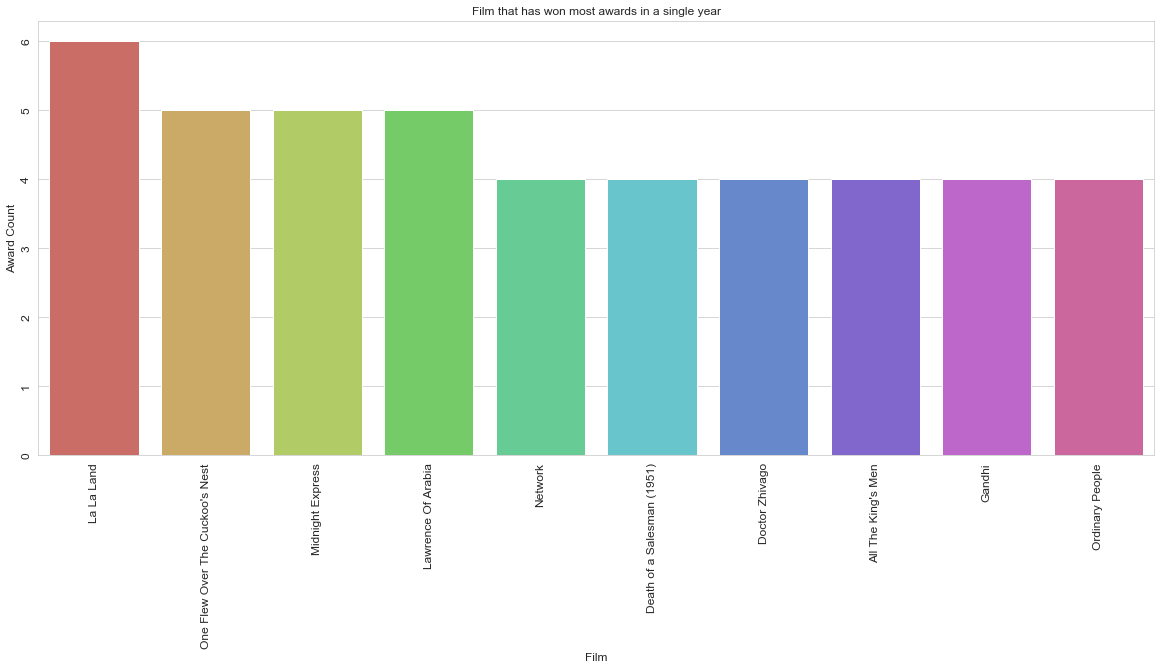

In [30]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='film', y='win', data=film_awards_year, palette='hls')
plt.title('Film that has won most awards in a single year', fontsize=12)
plt.xlabel('Film', fontsize=12)
plt.ylabel('Award Count', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=90, fontsize=12)
plt.show()

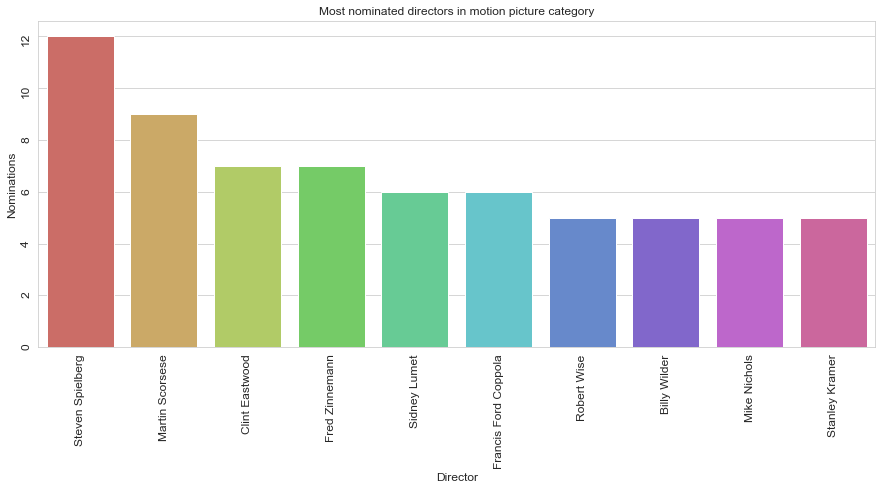

In [31]:
director_motion_picture = df[df['category'].str.contains('Best Director - Motion Picture')]
director_motion_picture = director_motion_picture.groupby('nominee')['win'].count().reset_index().sort_values(ascending=False, by='win')
director_motion_picture = director_motion_picture.head(10)

plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.barplot(x='nominee', y='win', data=director_motion_picture, palette='hls')
plt.title('Most nominated directors in motion picture category', fontsize=12)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Nominations', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=90, fontsize=12)
plt.show()